In [27]:
from IPython.display import Image

## Data
The objective of this task is to build a model to predict the chlorophyll index of several sites in `data/testing.csv`,
given 16 reflectances per-site, as well as training data in `data/training.csv` and validation data in `data/validation.csv`.

Below is a series of line plots of wavelengths sampled from `data/training.csv`, sorted by chlorophyll value:

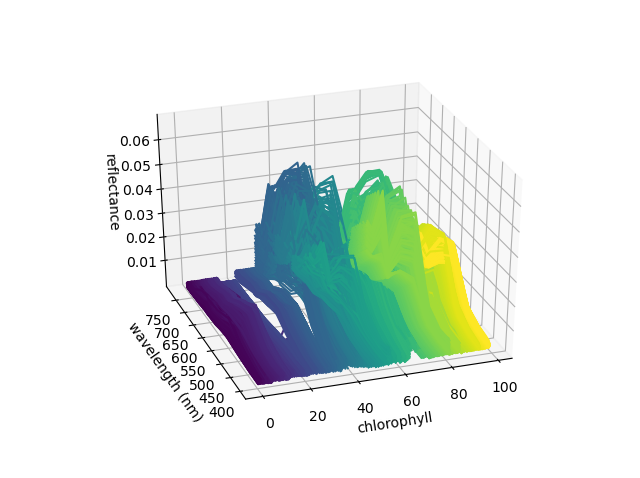

In [28]:
Image("images/0_training_data.png")

This shows the pattern to which the model will fit predicted chlorophyll.
I figured that a good rough comparison metric would involve comparing the RMSE of the reference data provided in `validation.csv`
(predicted vs in-situ measurements) with the standard deviation of the measurements.

## Model Fitting
I chose to use the Python PyTorch library because, from what I have read, it provides a more forgiving, debuggable, and Pythonic interface.

#### Manual Gradient Loss w/ Fixed Learning Rate: `models/1_autograd.py`
Using `requires_grad=True`, I optimized weights with a learning rate of `1e-6`, fitting.
I chose a hidden layer size of 2/3 of the input layer size plus the output layer size, following a rule-of-thumb I [found online](https://www.heatonresearch.com/2017/06/01/hidden-layers.html).

Below is a plot of sums of squared error (from predicted to reference) over time, using the original hidden layer size:

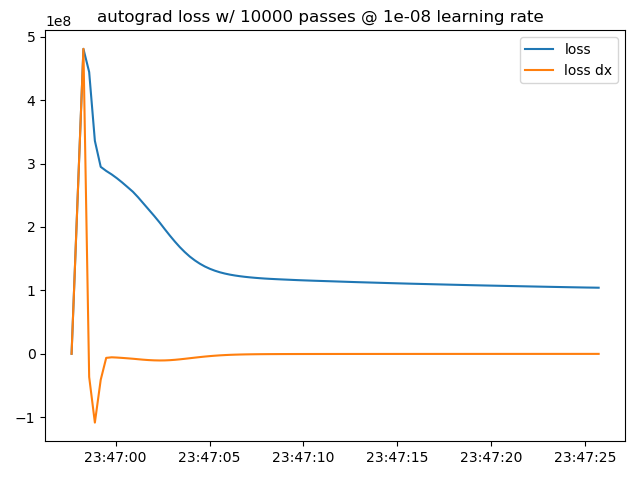

In [29]:
Image("images/1_autograd.png")

After optimizing weights over 10000 iterations on this run, the RMSE of predicted data vs reference data, around `8.5` over several runs, was within 20% of the standard deviation of in-situ measurements, `9.38`.

Results from this model are stored in the `Chl` column of `outputs/1_autograd/testing.csv`.

#### PyTorch Neural Network Module: `models/2_nn.py`
Replaces manual gradient following with usage of PyTorch's `torch.nn` module, building a model with three explicit layers and the built-in Adam optimizer and a much more liberal initial learning rate.

Below is a plot of sums of mean squared error (from predicted to reference) over time, using the original hidden layer size:

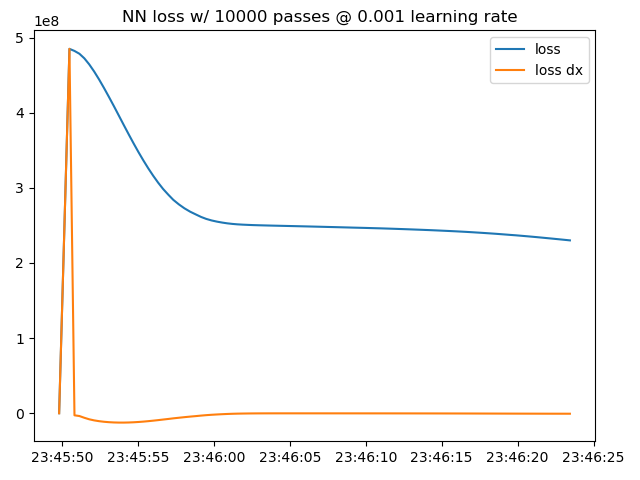

In [30]:
Image("images/2_nn.png")

This run showed resulting metrics similar to the previous, with RMSE slightly better at around `6.9` (versus standard deviation of in-situ measurements `9.38`).

Results from this model are stored in the `Chl` column of `outputs/2_nn/testing.csv`.

#### Optimizing Hidden Layer Size: `models/3_nn_optimH.py`
Since this methodology returns a concrete metric (RMSE) that can be minimized, this means that the size of the hidden layer can also be optimized.


In [31]:
Image("images/3_nn_optimH.png")

FileNotFoundError: No such file or directory: 'images/3_nn_optimH.png'

FileNotFoundError: No such file or directory: 'images/3_nn_optimH.png'

<IPython.core.display.Image object>

#### Further Optimization
Several other factors can be optimized programmatically, for example number of iterations `passes` and the optimizer algorithm.